In [3]:
import preprocessing as prep
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [22]:
path_list = [
    "../00_Data/testset_2015_1h/2015082215",
    "../00_Data/testset_2015_1h/2015092215",
    "../00_Data/testset_2015_1h/2015102215"
]
#path_list = ["../00_Data/testset_2015_1h/2015102215"]

In [23]:
def get_distances(df):
    df = df.reset_index(level = 'frame_idx')
    m = pd.merge(df, df, on='frame_idx')
    m = m[m.id_x < m.id_y]
    m.loc[:, 'dist'] = np.sqrt(np.square(m.xpos_x - m.xpos_y) \
        + np.square(m.ypos_x - m.ypos_y))
    return m

In [24]:
def plot_hist_distances(dists):
    dists['dist'].plot.hist(bins=20)
    plt.show()
    dists['dist'].plot.box()
    plt.show()
    print(dists['dist'].describe())


### file ../00_Data/testset_2015_1h/2015082215 cam 0

### file ../00_Data/testset_2015_1h/2015082215 cam 1

### file ../00_Data/testset_2015_1h/2015082215 cam 2

### file ../00_Data/testset_2015_1h/2015082215 cam 3


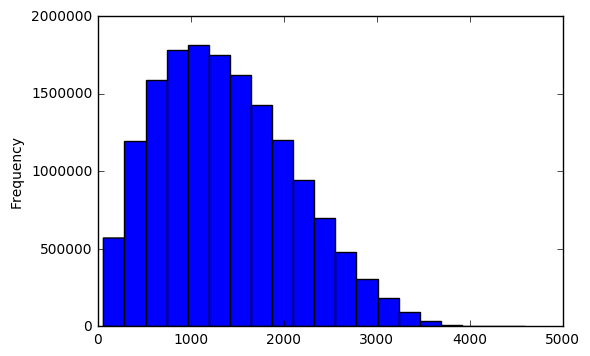

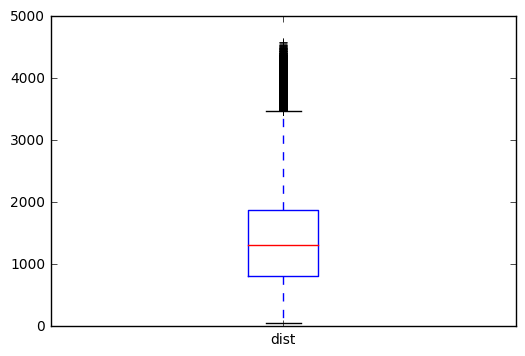

count    1.572224e+07
mean     1.384305e+03
std      7.269224e+02
min      5.900847e+01
25%      8.136172e+02
50%      1.308511e+03
75%      1.877365e+03
max      4.594164e+03
Name: dist, dtype: float64

### file ../00_Data/testset_2015_1h/2015092215 cam 0

### file ../00_Data/testset_2015_1h/2015092215 cam 1

### file ../00_Data/testset_2015_1h/2015092215 cam 2

### file ../00_Data/testset_2015_1h/2015092215 cam 3


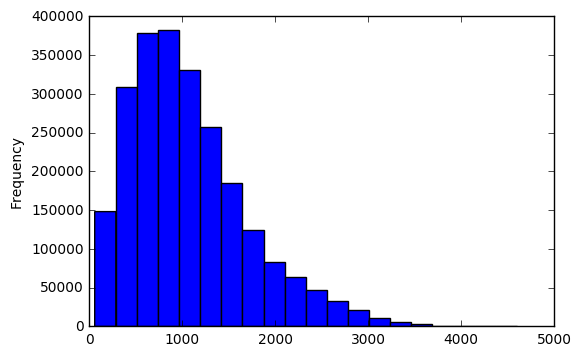

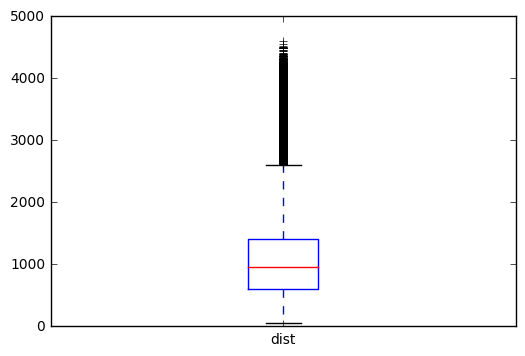

count    2.383258e+06
mean     1.069729e+03
std      6.334203e+02
min      6.000000e+01
25%      5.996841e+02
50%      9.520383e+02
75%      1.404066e+03
max      4.599340e+03
Name: dist, dtype: float64

### file ../00_Data/testset_2015_1h/2015102215 cam 0

### file ../00_Data/testset_2015_1h/2015102215 cam 1

### file ../00_Data/testset_2015_1h/2015102215 cam 2

### file ../00_Data/testset_2015_1h/2015102215 cam 3


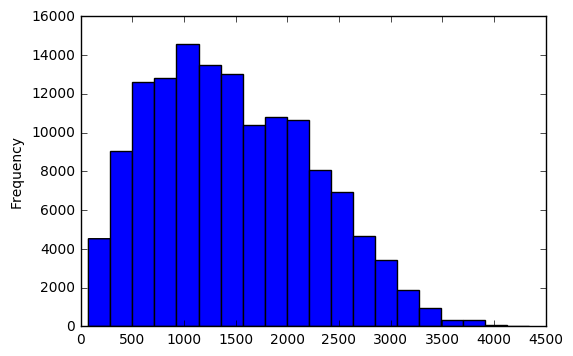

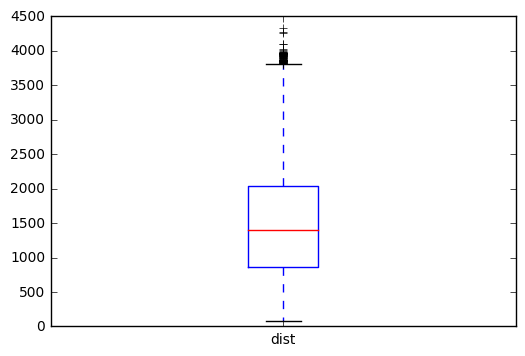

count    138595.000000
mean       1478.103437
std         775.176450
min          76.537572
25%         858.845446
50%        1405.611966
75%        2038.457505
max        4338.547453
Name: dist, dtype: float64


In [25]:
for p in path_list:
    
    df_all = DataFrame()
    for i in list(range(4)):
        
        fc = prep.get_fc(p, i)
        df = prep.get_dataframe(fc)
        df = prep.calcIds(df, 0.9)
        df = get_distances(df)
        df = df[['frame_idx', 'id_x', 'id_y', 'dist']]
        df_all = pd.concat([df_all, df])

    plot_hist_distances(df_all)

### Look at number of neigbours

In [26]:
dist_list = [60,80,100,120,140,160,180,200,220,240,260,280,300,320]

In [27]:
p = "../00_Data/testset_2015_1h/2015082215"

In [28]:
df_all = DataFrame()
for i in list(range(4)):

    fc = prep.get_fc(p, i)
    df = prep.get_dataframe(fc)
    df = prep.calcIds(df, 0.9)
    df = get_distances(df)
    df = df[['frame_idx', 'id_x', 'id_y', 'dist']]
    df_all = pd.concat([df_all, df])


### file ../00_Data/testset_2015_1h/2015082215 cam 0

### file ../00_Data/testset_2015_1h/2015082215 cam 1

### file ../00_Data/testset_2015_1h/2015082215 cam 2

### file ../00_Data/testset_2015_1h/2015082215 cam 3


60


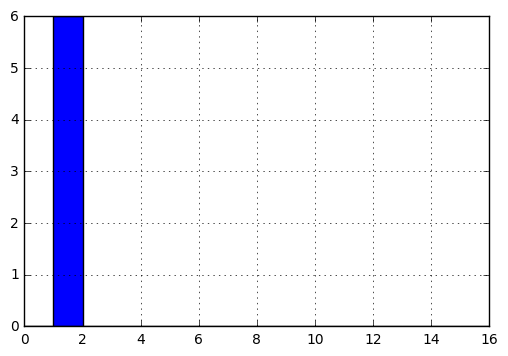

80


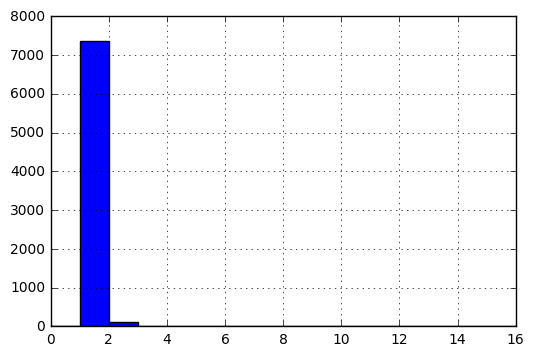

100


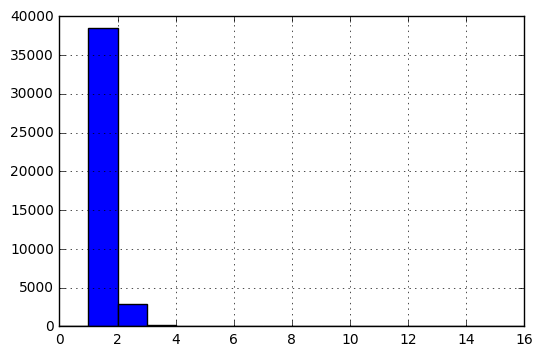

120


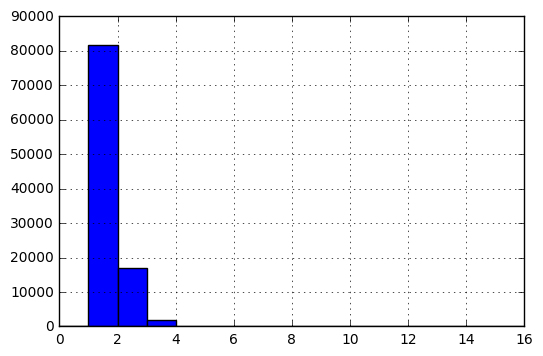

140


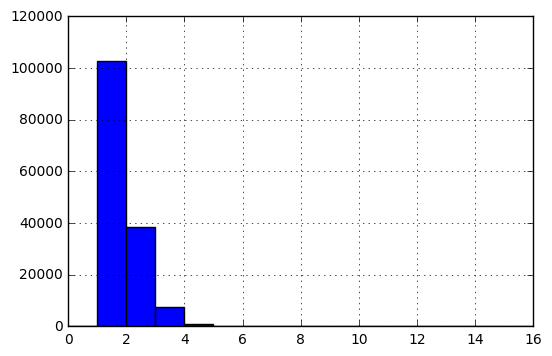

160


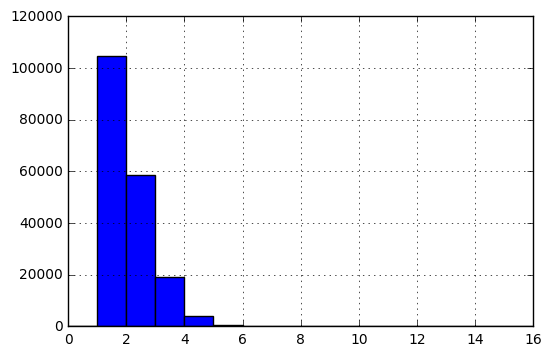

180


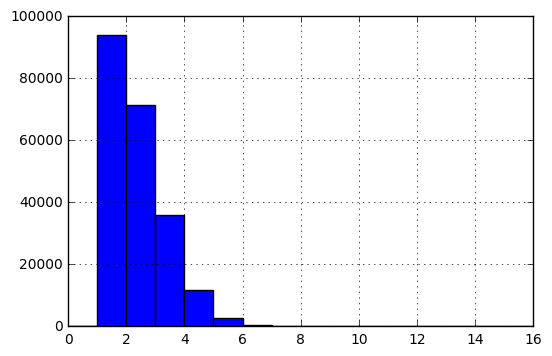

200


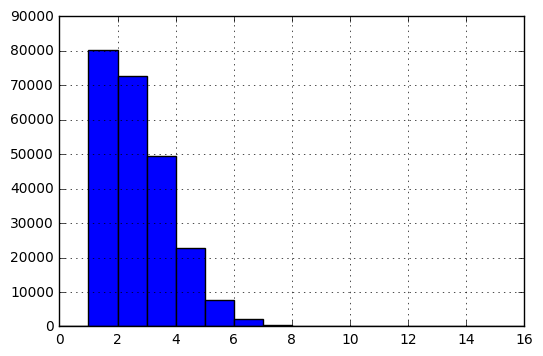

220


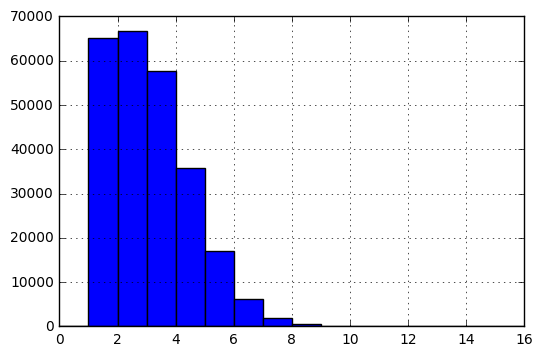

240


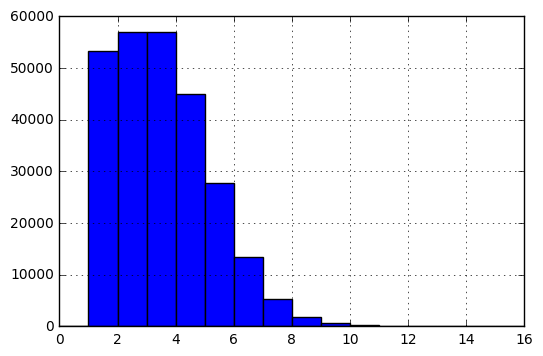

260


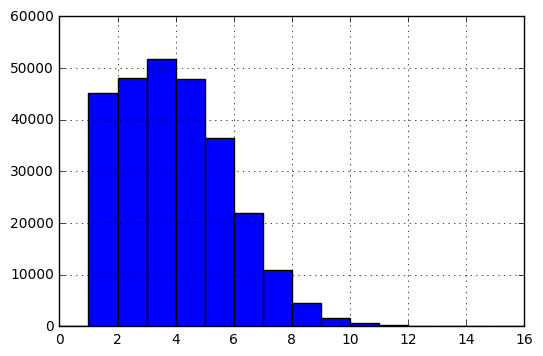

280


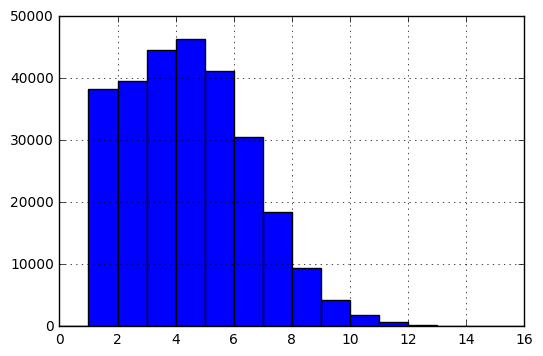

300


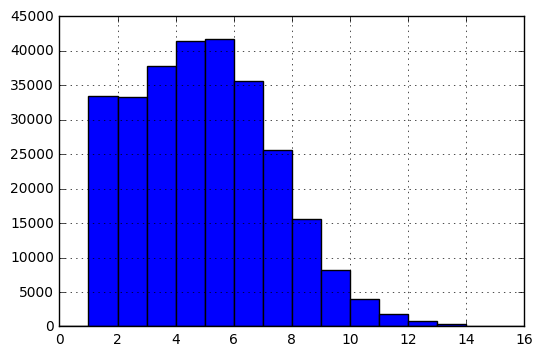

320


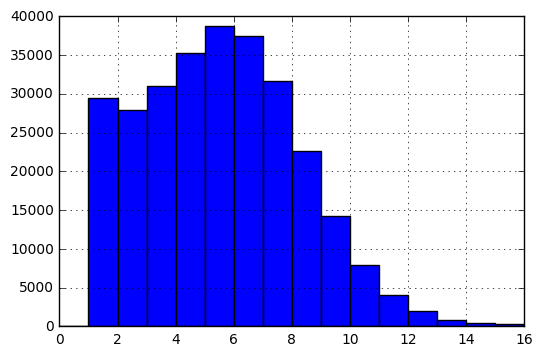

In [34]:
for l in dist_list:

    print(l)
    maxdist = l
    filtered = df_all[df_all.dist < maxdist]
    gr = filtered.groupby(by='frame_idx')

    neigbours = DataFrame()

    for i, group in gr:
        ids = pd.concat([group.id_x, group.id_y])
        counts = DataFrame(ids.value_counts(), columns=['c'])
        counts['frame_idx'] = i
        neigbours = pd.concat([neigbours, counts])
        
    neigbours['c'].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    plt.show()